In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('SeismicData_Mag.csv')

In [56]:
df.head()

,Latitude,Longitude,Depth,Time,OriginID,EventID,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,37.021,-115.988,0.00,717260640.0,675330,653332,1992267,41,41,3,4.4,4.3,ex
1,37.021,-115.989,0.34,717260640.0,3963015,653332,1992267,-1,41,3,-999.0,-999.0,en
2,37.021,-115.988,0.00,717260640.0,5031582,653332,1992267,41,41,3,-999.0,4.4,ec
3,37.021,-115.988,0.00,717260640.0,6192665,653332,1992267,-1,41,3,4.4,-999.0,en
4,37.207,-116.210,0.00,716835600.0,675113,653134,1992262,43,41,3,4.4,-999.0,ex


In [57]:
df.shape

(632, 13)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    632 non-null    float64
 1   Longitude   632 non-null    float64
 2   Depth       632 non-null    float64
 3   Time        632 non-null    float64
 4   OriginID    632 non-null    int64  
 5   EventID     632 non-null    int64  
 6   JulianDate  632 non-null    int64  
 7   Ndef        632 non-null    int64  
 8   Grn         632 non-null    int64  
 9   Srn         632 non-null    int64  
 10  Mb          632 non-null    float64
 11  Ml          632 non-null    float64
 12  EvtType     632 non-null    object 
dtypes: float64(6), int64(6), object(1)
memory usage: 64.3+ KB


In [59]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Time', 'OriginID', 'EventID',
       'JulianDate', 'Ndef', 'Grn', 'Srn', 'Mb', 'Ml', 'EvtType'],
      dtype='object')

In [60]:
np.unique(df['EvtType'])

array(['-', 'ec', 'en', 'ex', 'mc', 'qd', 'qf', 'qt'], dtype=object)

In [61]:
#Removing the unnecessary columns ('OriginID', 'EventID')
df.drop(columns = 'OriginID',inplace=True)
df.drop(columns = 'EventID',inplace=True)

In [62]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Time', 'JulianDate', 'Ndef', 'Grn',
       'Srn', 'Mb', 'Ml', 'EvtType'],
      dtype='object')

Data Processing

In [63]:
#finding categorical values
categorical = [var for var in df.columns if (df[var].dtype=='0' or df[var].dtype=='object')]
print('There are {} categorical variables\n' .format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['EvtType']


In [64]:
#finding numerical values
numerical = [var1 for var1 in df.columns if (df[var1].dtype=='int64' or df[var1].dtype=='float64')]
print('There are {} numerical variables\n' .format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 10 numerical variables

The numerical variables are :

 ['Latitude', 'Longitude', 'Depth', 'Time', 'JulianDate', 'Ndef', 'Grn', 'Srn', 'Mb', 'Ml']


Now, it is observed that there are columns such as EvtType which contains missing values. They can be checked using the 'Loc' operator

In [65]:
#searching missing records in the EvtType column
df.loc[df['EvtType']=='-']

,Latitude,Longitude,Depth,Time,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
30,37.2000,-116.2000,0.00,685297800.4,1991262,20,41,3,-999.0,4.20,-
235,36.9850,-116.0560,3.49,468952800.4,1984315,-1,40,3,-999.0,2.99,-
292,37.3500,-116.3200,-999.00,172414800.1,1975170,-1,41,3,-999.0,5.90,-
296,37.1893,-116.1938,0.00,748681260.0,1993265,10,41,3,-999.0,1.80,-
297,37.1802,-116.1847,10.50,748681259.3,1993265,33,41,3,-999.0,4.62,-
...,...,...,...,...,...,...,...,...,...,...,...
619,35.6000,-112.1100,10.00,736071660.7,1993119,-1,42,3,5.4,-999.00,-
624,37.1353,-113.4968,10.81,716107335.7,1992254,13,478,34,-999.0,2.65,-
627,37.1650,-113.3330,9.59,715429579.3,1992246,10,478,34,-999.0,5.90,-
628,37.1068,-113.5062,-999.00,715429560.0,1992246,-1,478,34,-999.0,5.80,-


There is a good amount of records in the EvtType column with no value, this could be because the seismic event could not be classified properly due to various reasons. The possible options here would be to either delete the record or make their value equal to NaN (Not a Number). For this case the second option will be taken because removing the record may lead to missing out on important datapoints.

In [66]:
# Replacing the unknown value to a NaN (Not a Number)
#df.loc[df['EvtType']=='-', 'EvtType'] = np.NaN
evtType = {'-':0, 'ec':0, 'en':1,'ex':0, 'mc':0,'qd':0,'qf':0,'qt':0}
df.EvtType = [evtType[item] for item in df.EvtType]

In [67]:
# Displaying count for each input type
df.EvtType.value_counts()

0    472
1    160
Name: EvtType, dtype: int64

In [68]:
# looking up null values (Not a Number)
df.isnull().sum()

Latitude      0
Longitude     0
Depth         0
Time          0
JulianDate    0
Ndef          0
Grn           0
Srn           0
Mb            0
Ml            0
EvtType       0
dtype: int64

Data Visualization

In [69]:
df.head()

,Latitude,Longitude,Depth,Time,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,37.021,-115.988,0.00,717260640.0,1992267,41,41,3,4.4,4.3,0
1,37.021,-115.989,0.34,717260640.0,1992267,-1,41,3,-999.0,-999.0,1
2,37.021,-115.988,0.00,717260640.0,1992267,41,41,3,-999.0,4.4,0
3,37.021,-115.988,0.00,717260640.0,1992267,-1,41,3,4.4,-999.0,1
4,37.207,-116.210,0.00,716835600.0,1992262,43,41,3,4.4,-999.0,0


Event Type (EvtType) is our target variable

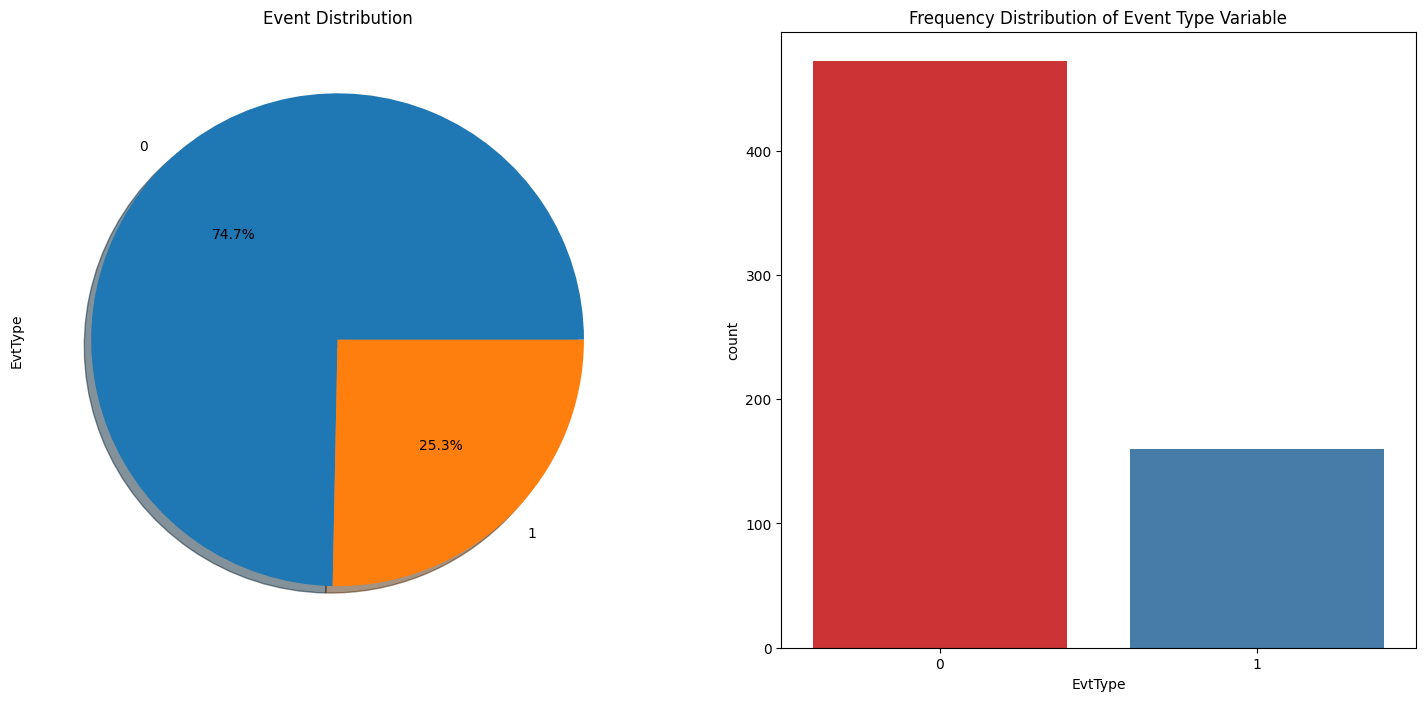

In [70]:
# Visualizing the EvtType column
f,ax = plt.subplots(1,2,figsize=(18,8))
ax[0] = df['EvtType'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%' , ax=ax[0], shadow=True)
ax[0].set_title('Event Distribution')

ax[1] = sns.countplot(x='EvtType', data=df, palette="Set1")
ax[1].set_title("Frequency Distribution of Event Type Variable")

plt.show()

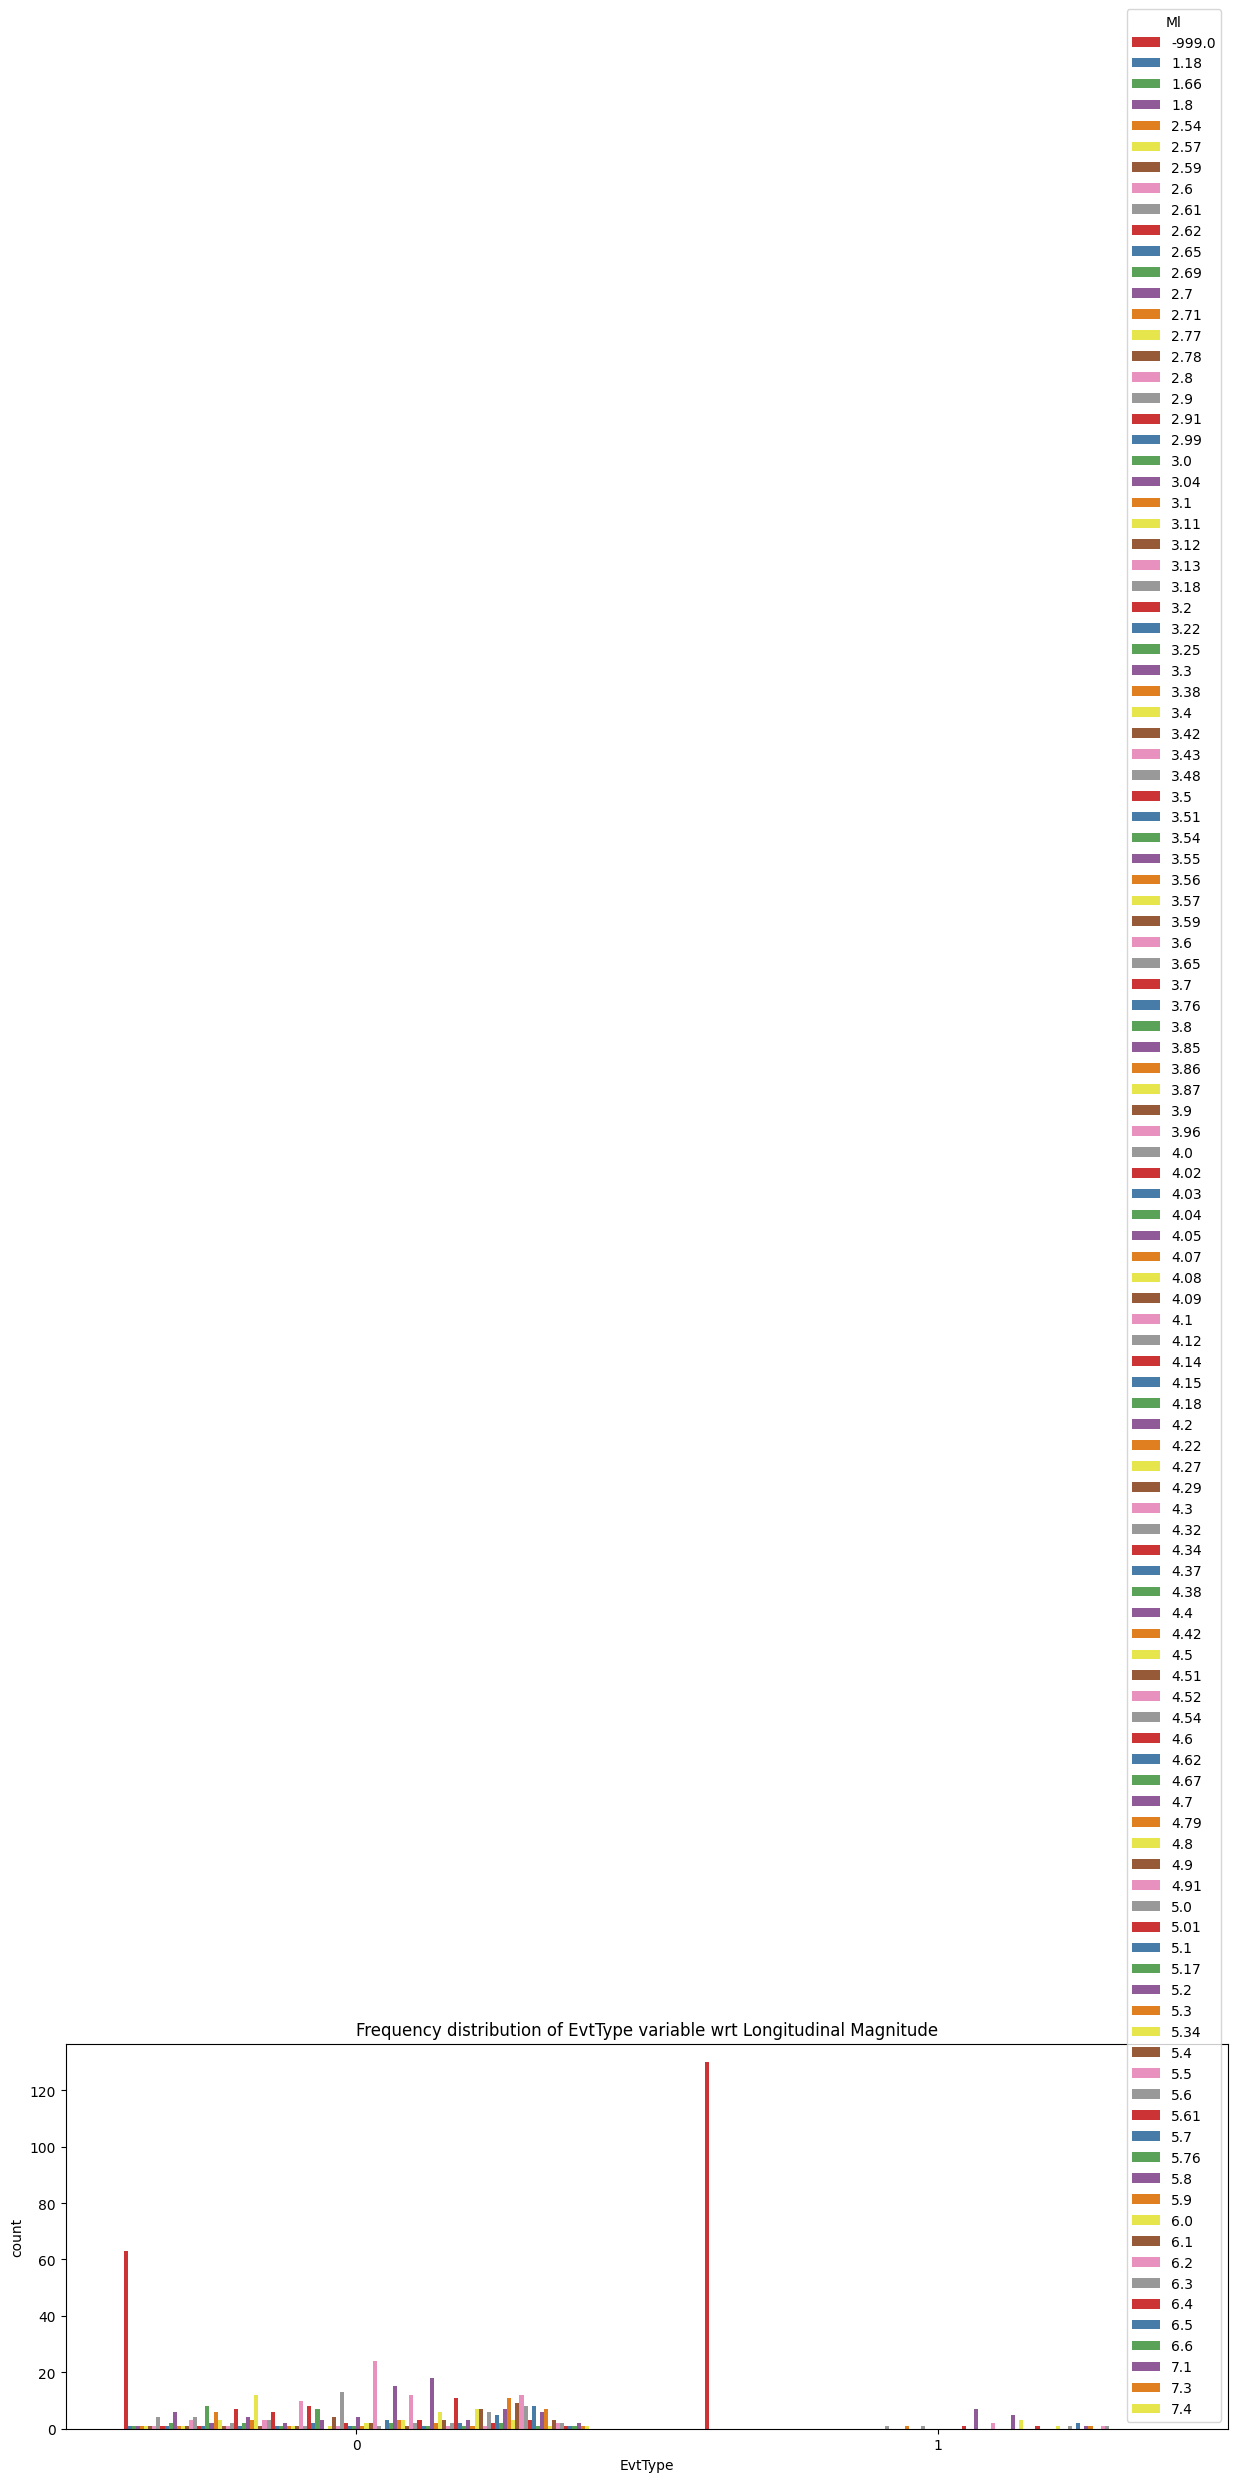

In [71]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="EvtType", hue="Ml", data=df, palette="Set1")
ax.set_title("Frequency distribution of EvtType variable wrt Longitudinal Magnitude")
plt.show()


Numerical Columns

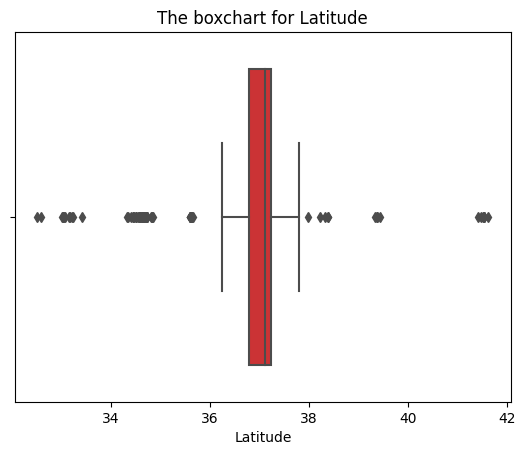

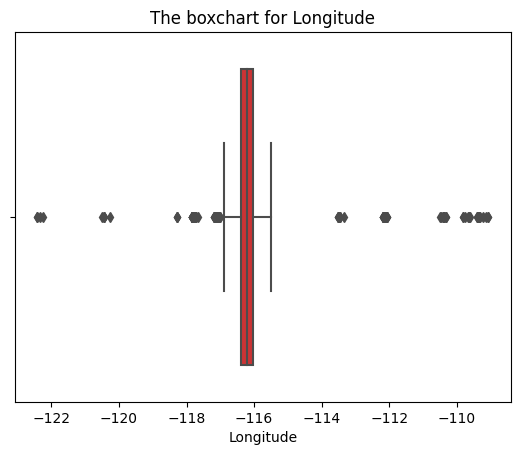

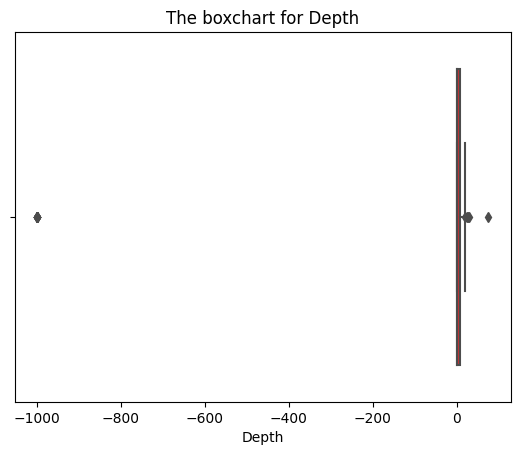

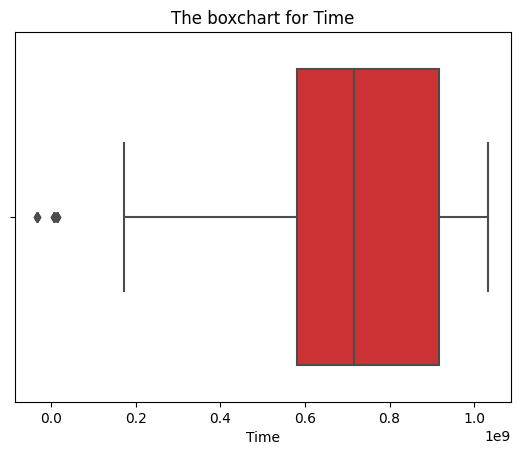

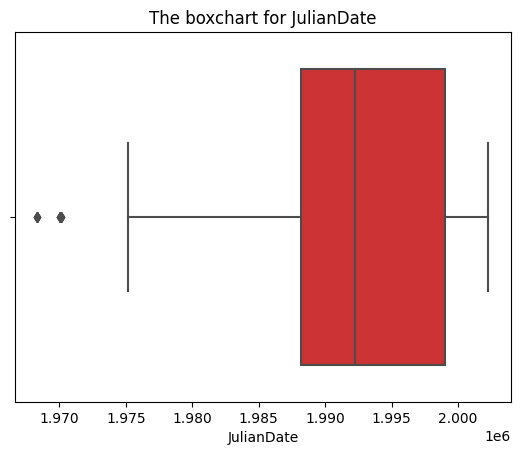

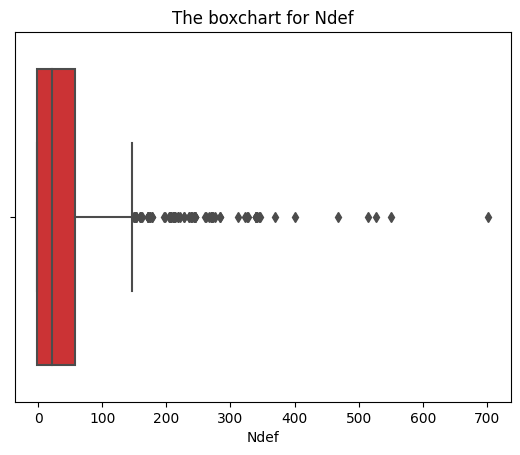

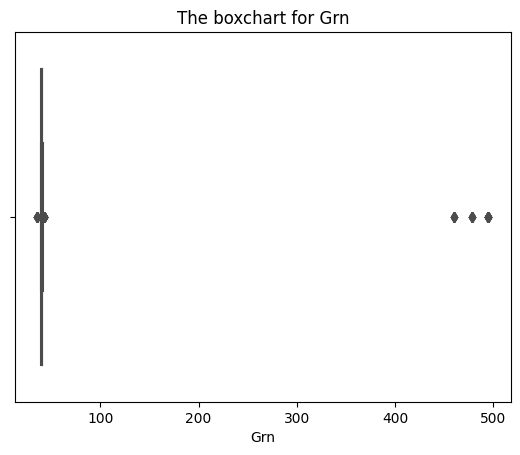

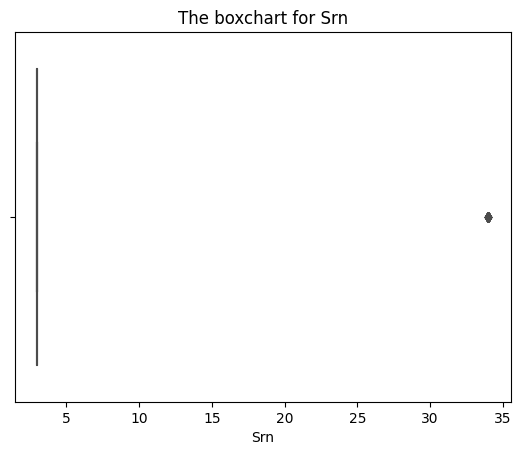

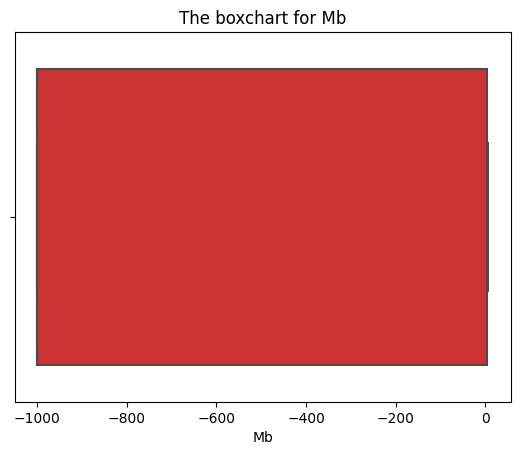

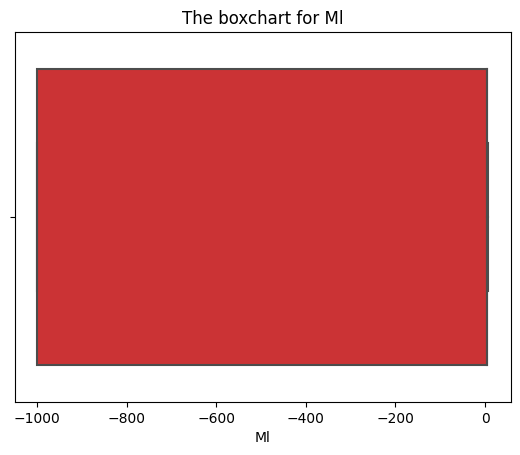

In [72]:
#Let's check for outliers in the numerical columns using box plots
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()



It can be observed that there are outliers in Ndef, Grn, and Srn

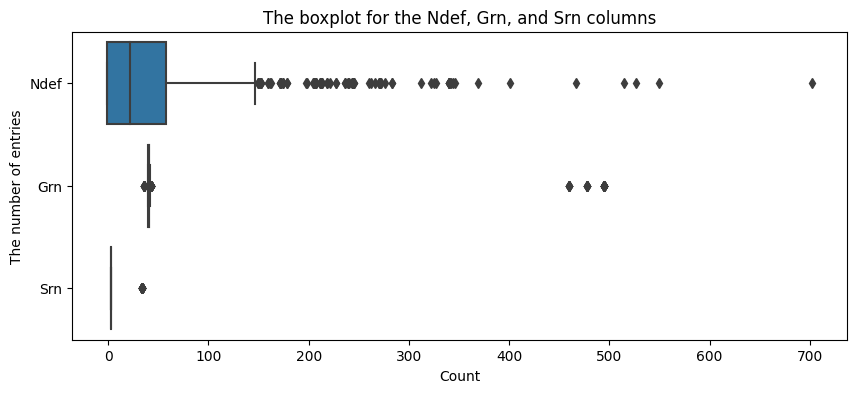

In [73]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the Ndef, Grn, and Srn columns')
sns.boxplot( data=df[['Ndef','Grn', 'Srn']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Count')
plt.show()


In [74]:
# Droping outliers as they can lead to the result being distorted
Nout = df.loc[df['Ndef']>600, 'Ndef'].index
df.drop(index=Nout, inplace=True)

In [75]:
grnOut = df.loc[df['Grn']>400, 'Grn'].index
df.drop(index=grnOut, inplace=True)

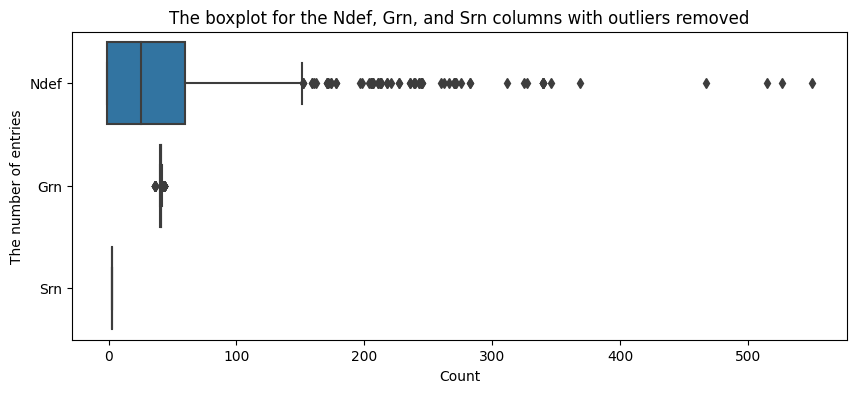

In [76]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the Ndef, Grn, and Srn columns with outliers removed')
sns.boxplot( data=df[['Ndef','Grn', 'Srn']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Count')
plt.show()


In [77]:
numerical

['Latitude',
 'Longitude',
 'Depth',
 'Time',
 'JulianDate',
 'Ndef',
 'Grn',
 'Srn',
 'Mb',
 'Ml']

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


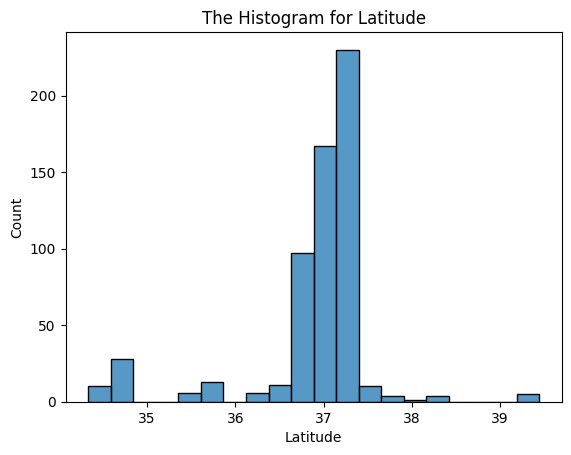

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


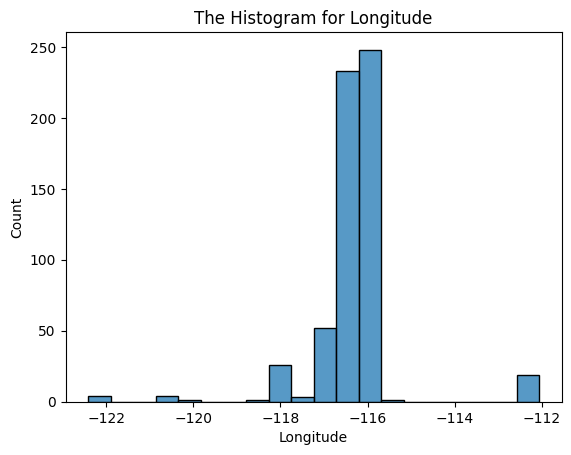

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


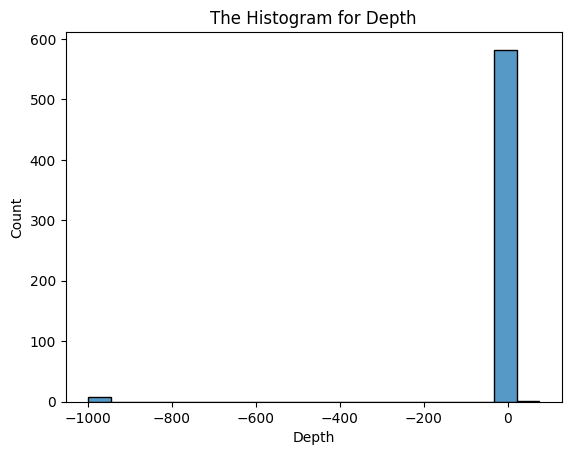

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


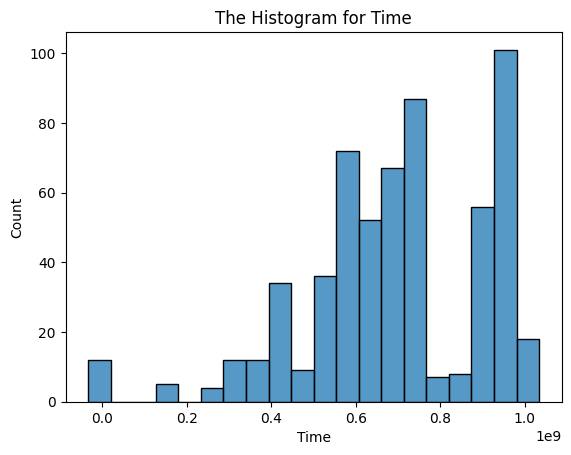

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


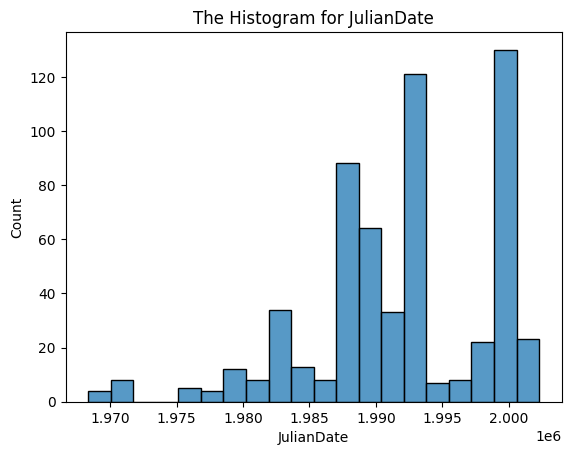

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


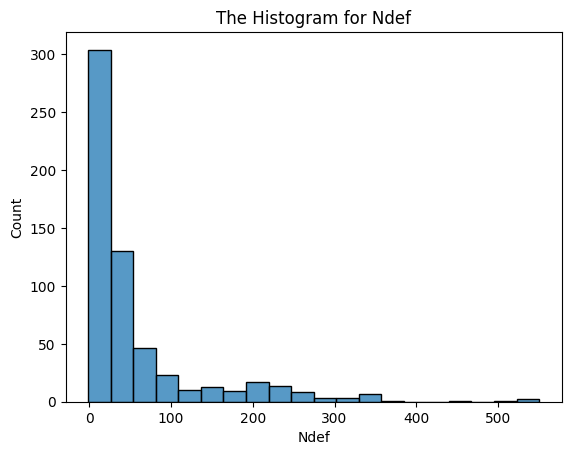

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


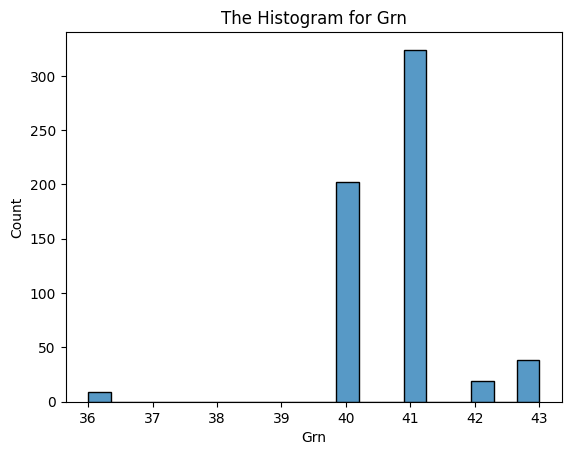

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


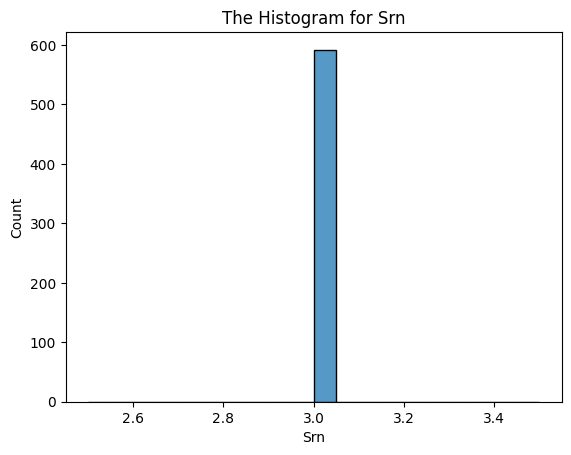

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


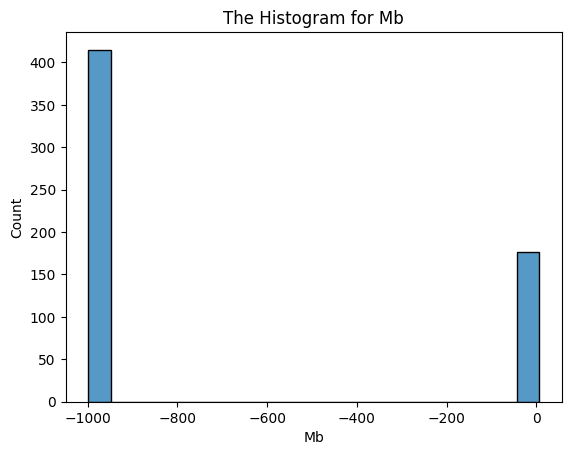

<ipython-input-78-e39ab26c5dec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


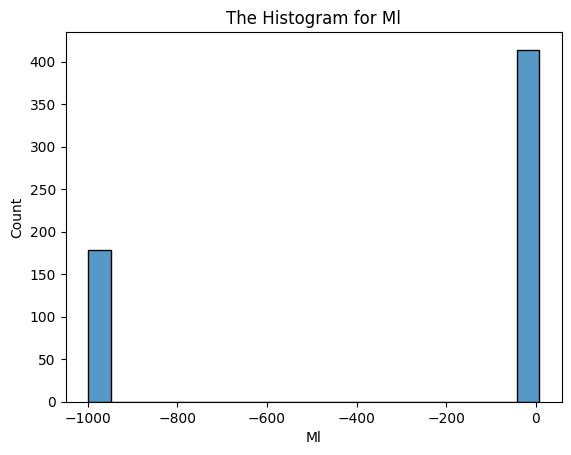

In [78]:
# Histograms representing distribution of each column
for i in numerical:
    sns.histplot(x=df[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()


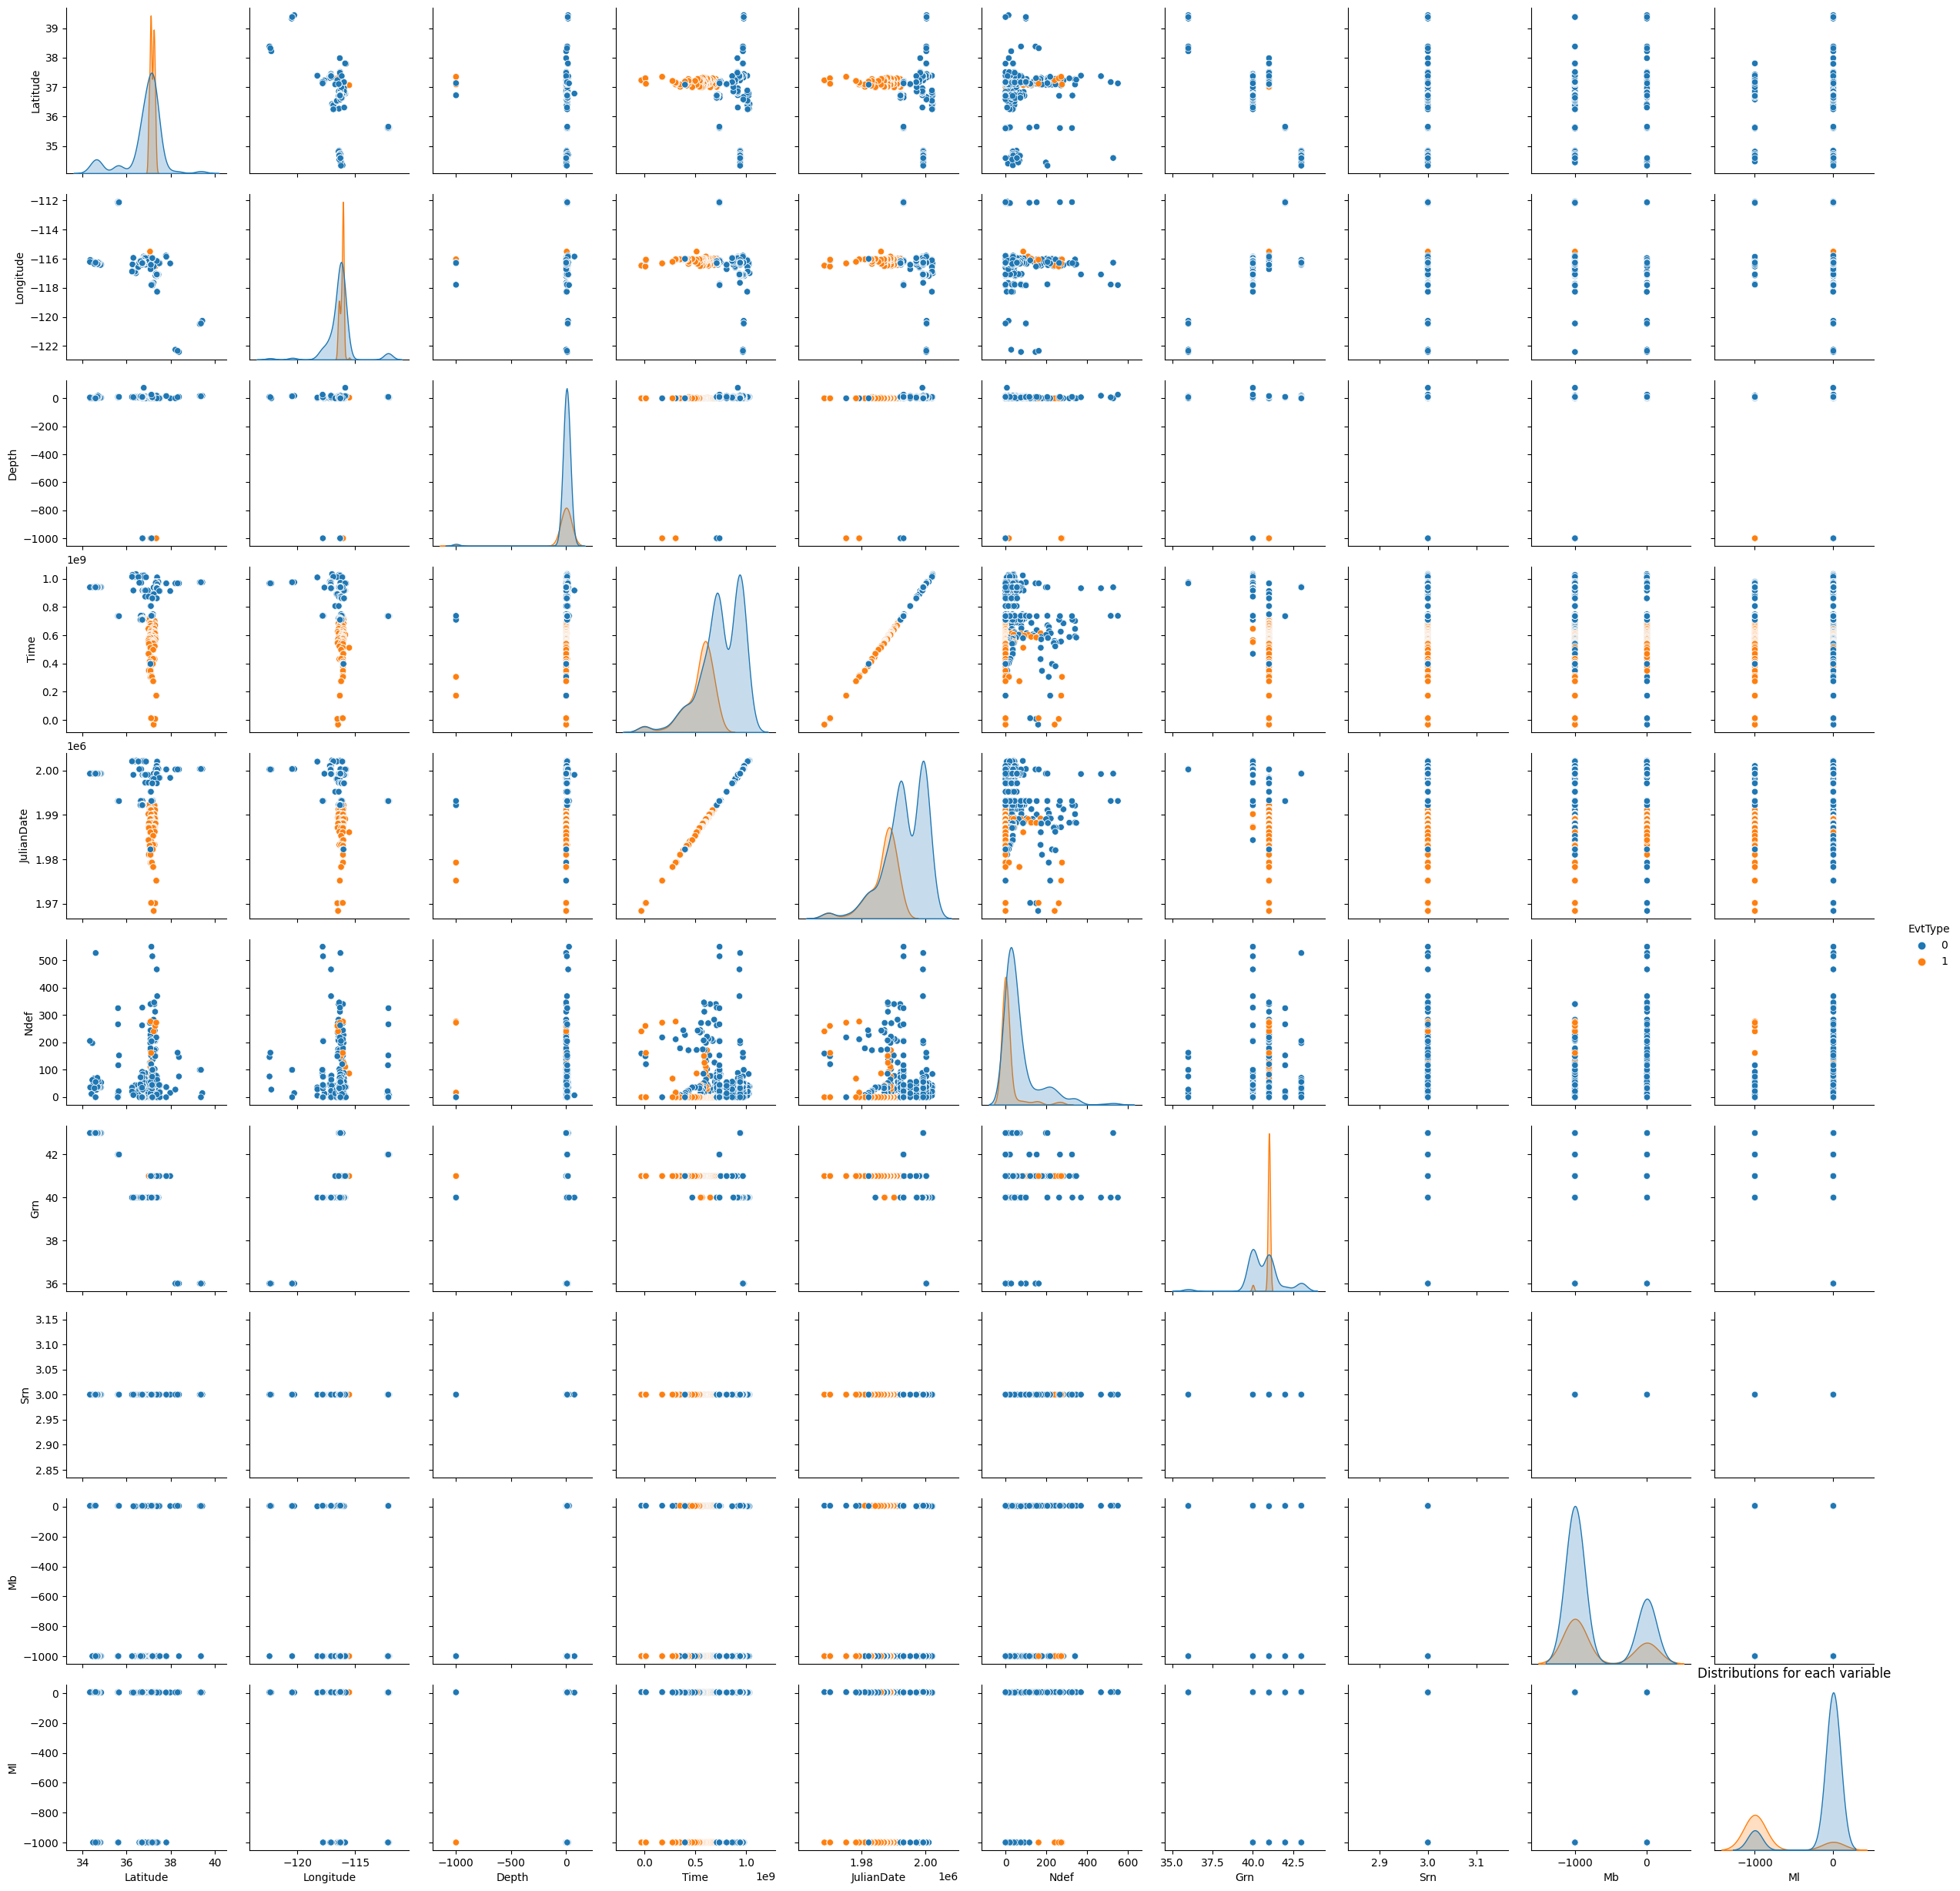

In [79]:
sns.pairplot(data=df, hue="EvtType")
plt.title('Distributions for each variable')
plt.show()


In [80]:
categorical

['EvtType']

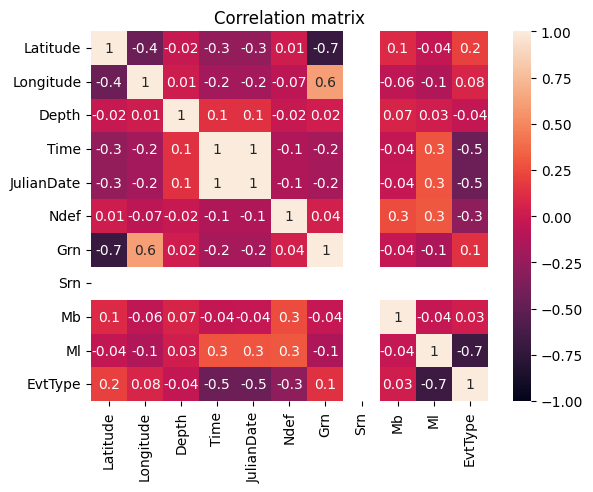

In [81]:
corr = df.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()


Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [84]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Time', 'JulianDate', 'Ndef', 'Grn',
       'Srn', 'Mb', 'Ml', 'EvtType'],
      dtype='object')

In [85]:
label_list = ['Latitude', 'Longitude', 'Depth', 'Time', 'JulianDate', 'Ndef', 'Grn','Srn', 'Mb', 'Ml']
for i in label_list:
    label_encoder(i)

In [86]:
df.head()

,Latitude,Longitude,Depth,Time,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,125,264,1,159,76,34,2,0,19,67,0
1,125,263,23,159,76,0,2,0,0,0,1
2,125,264,1,159,76,34,2,0,0,71,0
3,125,264,1,159,76,0,2,0,19,0,1
4,201,177,1,157,75,36,2,0,19,0,0


Normalizing the variables

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
df.head()

,Latitude,Longitude,Depth,Time,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,125,264,1,159,76,34,2,0,19,67,0
1,125,263,23,159,76,0,2,0,0,0,1
2,125,264,1,159,76,34,2,0,0,71,0
3,125,264,1,159,76,0,2,0,19,0,1
4,201,177,1,157,75,36,2,0,19,0,0


In [90]:
scaler.fit(df)

MinMaxScaler()

In [91]:
scaled_features = scaler.transform(df)

In [92]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Time', 'JulianDate', 'Ndef', 'Grn',
       'Srn', 'Mb', 'Ml', 'EvtType'],
      dtype='object')

In [93]:
columns = ['Latitude', 'Longitude', 'Depth', 'Time', 'JulianDate', 'Ndef', 'Grn',
       'Srn', 'Mb', 'Ml','EvtType']

In [94]:
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,Latitude,Longitude,Depth,Time,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,0.448029,0.846154,0.005051,0.498433,0.612903,0.257576,0.5,0.0,0.5,0.620370,0.0
1,0.448029,0.842949,0.116162,0.498433,0.612903,0.000000,0.5,0.0,0.0,0.000000,1.0
2,0.448029,0.846154,0.005051,0.498433,0.612903,0.257576,0.5,0.0,0.0,0.657407,0.0
3,0.448029,0.846154,0.005051,0.498433,0.612903,0.000000,0.5,0.0,0.5,0.000000,1.0
4,0.720430,0.567308,0.005051,0.492163,0.604839,0.272727,0.5,0.0,0.5,0.000000,0.0


Text(0.5, 1.0, 'Graphical Representation of Events With Respect To their Depth and Time of Arrival')

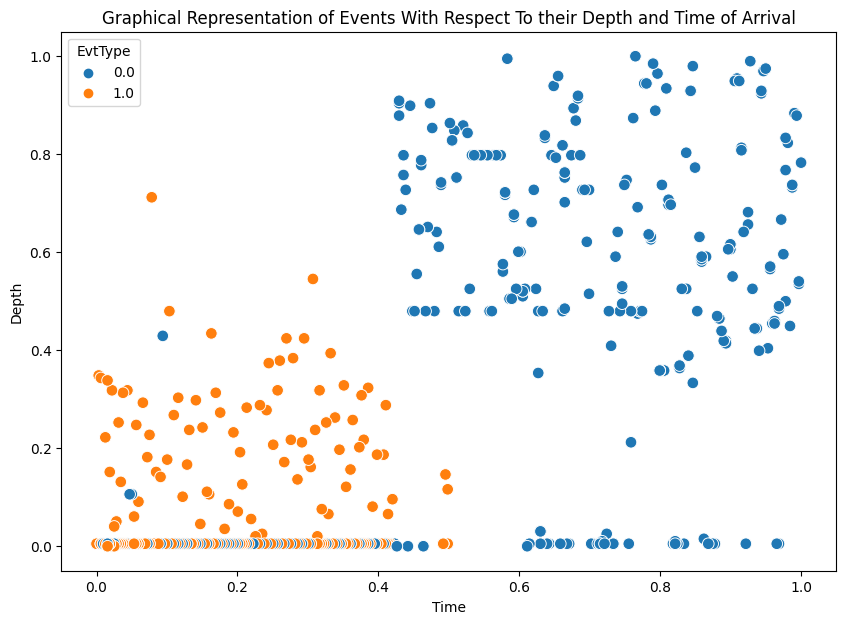

In [95]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= 'Time', y='Depth', s=70, hue='EvtType',data=df_scaled)
plt.title("Graphical Representation of Events With Respect To their Depth and Time of Arrival")

In [96]:
X = df_scaled.drop(columns='EvtType')
Y = df_scaled['EvtType']

Train_Test_split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101,shuffle=True)

In [99]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


X_train shape: (473, 10)
X_test shape: (119, 10)
y_train shape: (473,)
y_test shape: (119,)


In [100]:
# To store results of models
result_dict_train = {}
result_dict_test = {}


Building Model with SVM Classifier SVC

In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score: " ,np.mean(accuracies))
print("Validate Score: " , svc.score(X_test,y_test))

Train Score:  0.9555879059350504
Validate Score:  0.9831932773109243


In [102]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Validation Score"] = svc.score(X_test,y_test)

Fine Tuning Model

In [104]:
# Fine tuning model. Determining which kernel will yeild the best results on the data we have
grid = {
    'C':[0.01,0.1,1],
    'kernel' : ["rbf","poly","linear"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Validation Score:",svm_cv.score(X_test,y_test))



Best Parameters: {'C': 0.1, 'degree': 7, 'gamma': 1, 'kernel': 'poly'}
Train Score: 0.972541993281075
Validation Score: 0.9831932773109243
